In [ ]:
# necessary libraries
import os
import pandas as pd
import numpy as np

# visualizations libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread
%matplotlib inline

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, TensorBoard


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# model evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = '/content/drive/MyDrive/TB models/seg_tb_collab.h5'
model = tf.keras.models.load_model(model)

In [ ]:
model.optimizer.get_weights()

In [ ]:
base_dir= '/content/drive/MyDrive/TB_segmented/'
os.listdir(base_dir)

tuberculosis_data= base_dir + 'TB/'
print("tuberculosis images :\n" ,os.listdir(tuberculosis_data)[:5])

normal_data= base_dir + 'Normal/'
print("\nnormal images :\n" ,os.listdir(normal_data)[:5])

tuberculosis images :
 ['CHNCXR_0328_1.png', 'CHNCXR_0327_1.png', 'CHNCXR_0329_1.png', 'CHNCXR_0333_1.png', 'CHNCXR_0334_1.png']

normal images :
 ['Normal-90.png', 'Normal-97.png', 'Normal-74.png', 'Normal-70.png', 'Normal-6.png']


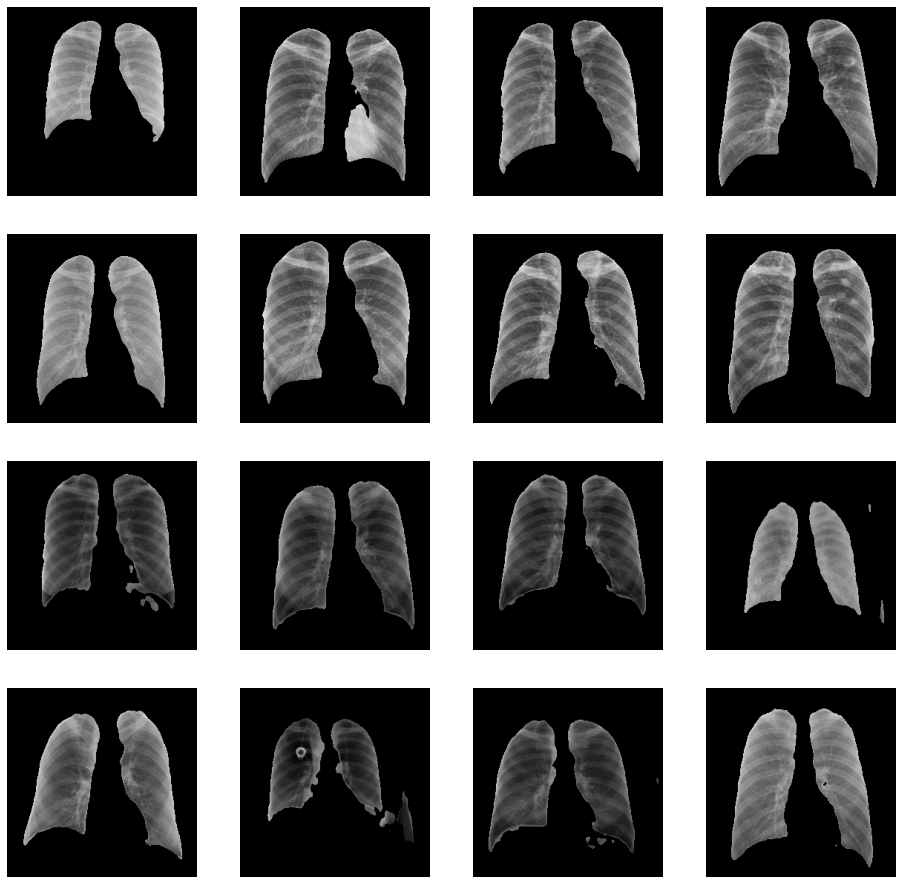

In [ ]:
nrows= 4
ncols= 4
pic_index= 0

fig= plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

tuberculosis_img = [os.path.join(tuberculosis_data, image) for image in os.listdir(tuberculosis_data)[pic_index-8:pic_index]]
normal_img = [os.path.join(normal_data, image) for image in os.listdir(normal_data)[pic_index-8:pic_index]]

for i, image_path in enumerate(tuberculosis_img+normal_img):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(image_path)
    plt.imshow(img,cmap = 'gray')

plt.show()

In [ ]:
# generating training data
print("training data :")
train_datagen= ImageDataGenerator(rescale=1/255, zoom_range=0.3, rotation_range=50, width_shift_range= 0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest', validation_split = 0.2)

train_data = train_datagen.flow_from_directory(base_dir, 
                                              target_size= (256, 256),
                                              class_mode= "binary",
                                              batch_size=30,
                                              subset= "training"
                                              )

# genarating validation data
print("\nvalidation data :")
val_datagen= ImageDataGenerator(rescale= 1/255, validation_split= 0.2)

val_data= train_datagen.flow_from_directory(base_dir, 
                                              target_size= (256, 256),
                                              class_mode= "binary",
                                              batch_size=30,
                                              shuffle= False,
                                              subset= "validation"
                                              )

training data :
Found 1364 images belonging to 2 classes.

validation data :
Found 340 images belonging to 2 classes.


In [ ]:
#inception_model= InceptionV3(input_shape= (256, 256,3), include_top= False, weights='imagenet')

#last_output= inception_model.layers[-1].output


#last_output= Flatten()(last_output)


#pretrained_model= Model(inception_model.input, last_output)    

In [ ]:
# layer 1
#x= Dense(units=512, activation="relu")(last_output)
#x=Dropout(0.1)(x)

# layer 2
#x= Dense(units=128, activation="relu")(x)
#x=Dropout(0.1)(x)

# output layer
#x= Dense(units=1, activation="sigmoid")(x)

# final model
#model= Model(pretrained_model.input, x)

#model.summary()

In [ ]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["accuracy"])




callbacks = [
        EarlyStopping(patience=10, monitor='val_loss',mode = "min"),
        TensorBoard(log_dir='logs')]

model_checkpoint = ModelCheckpoint('tb_checkpoints.hdf5',
                                    monitor = 'val_accuracy',
                                    verbose = 1,
                                    save_best_only= True,
                                    mode= 'max')


history= model.fit(train_data,
                   steps_per_epoch= np.ceil(train_data.samples//train_data.batch_size),
                   validation_data= val_data,
                   validation_steps= np.ceil(val_data.samples//val_data.batch_size),
                   epochs= 100,
                   verbose=1,
                   callbacks = callbacks
                  )

print('Model Trained')

Epoch 1/100
45/45 [==============================] - 315s 7s/step - loss: 0.4967 - accuracy: 0.8411 - val_loss: 0.5340 - val_accuracy: 0.8697
Epoch 2/100
45/45 [==============================] - 271s 6s/step - loss: 0.3732 - accuracy: 0.8643 - val_loss: 0.5028 - val_accuracy: 0.8697
Epoch 3/100
45/45 [==============================] - 298s 7s/step - loss: 0.3186 - accuracy: 0.8853 - val_loss: 0.4796 - val_accuracy: 0.8818
Epoch 4/100
45/45 [==============================] - 301s 7s/step - loss: 0.3287 - accuracy: 0.8823 - val_loss: 0.4658 - val_accuracy: 0.8242
Epoch 5/100
45/45 [==============================] - 299s 7s/step - loss: 0.2961 - accuracy: 0.8921 - val_loss: 0.3706 - val_accuracy: 0.8939
Epoch 6/100
45/45 [==============================] - 297s 7s/step - loss: 0.2622 - accuracy: 0.9115 - val_loss: 0.4841 - val_accuracy: 0.8848
Epoch 7/100
45/45 [==============================] - 302s 7s/step - loss: 0.2907 - accuracy: 0.9070 - val_loss: 0.4220 - val_accuracy: 0.8636
Epoch 

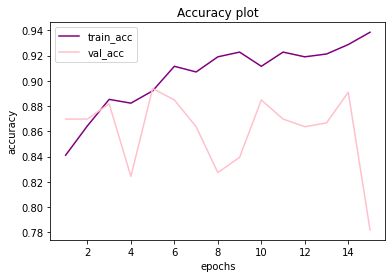

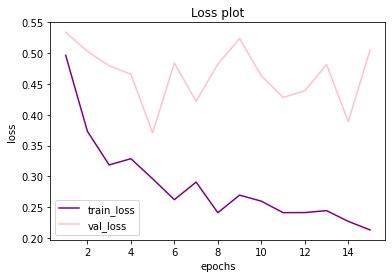

In [ ]:
epochs= range(1, len(history.history["accuracy"])+1)

plt.plot(epochs, history.history["accuracy"], color="purple")
plt.plot(epochs, history.history["val_accuracy"], color="pink")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy plot")
plt.legend(["train_acc", "val_acc"])
plt.show()

plt.plot(epochs, history.history["loss"], color="purple")
plt.plot(epochs, history.history["val_loss"], color="pink")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss plot")
plt.legend(["train_loss", "val_loss"])
plt.show()

In [ ]:
prediction= model.predict(val_data, steps=np.ceil(val_data.samples/val_data.batch_size), verbose=2)
prediction= (prediction > 0.5)
#prediction

12/12 - 53s - 53s/epoch - 4s/step


In [ ]:
cm= confusion_matrix(val_data.classes, prediction)
#plot_confusion_matrix(cm, figsize=(5,5))

print(accuracy_score(val_data.classes, prediction))
print(classification_report(val_data.classes, prediction))

0.8088235294117647
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       271
           1       0.52      0.72      0.61        69

    accuracy                           0.81       340
   macro avg       0.72      0.78      0.74       340
weighted avg       0.84      0.81      0.82       340



In [ ]:
model.save("seg_tb_collab_update_1.h5")